<a href="https://colab.research.google.com/github/RomanBr89/HW2-/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Файл успешно загружен")


        print(df.head())
        print(df.info())
        print(df.describe())
        print("Пропущенные значения по колонкам:")
        print(df.isnull().sum())

        return df
    except Exception as e:
        print(f"Ошибка при загрузке CSV: {e}")
        return None

df = load_csv("Salary_Data.csv")

Файл успешно загружен
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
Пропущенные значения по колонкам:
YearsExperience    0
Salary             0
dtype: int64


In [ ]:
import pandas as pd


def check_missing(df, columns):
    missing = df[columns].isnull().sum()
    print("Пропущенные значения по колонкам:")
    print(missing)
    return missing

def fill_missing(df, column, method='mean'):
    if method == 'mean':
        df[column] = df[column].fillna(df[column].mean())
    elif method == 'median':
        df[column] = df[column].fillna(df[column].median())
    return df



Гистограмма зарплат:


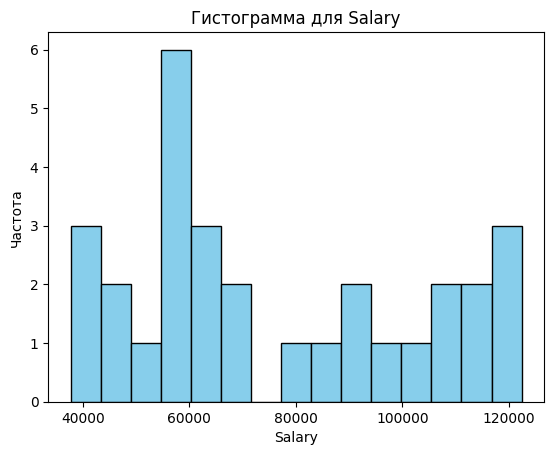

Диаграмма рассеяния: Опыт vs Зарплата


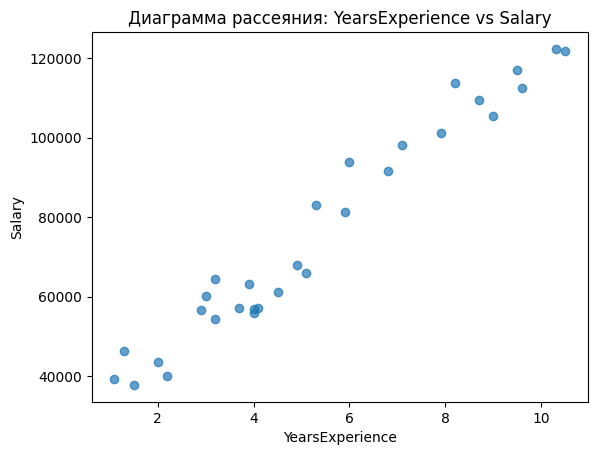

Boxplot зарплат по опыту:


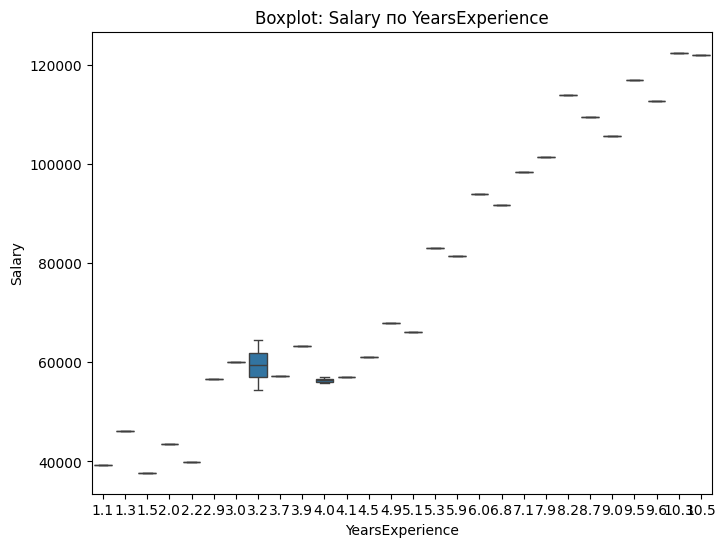

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_histogram(df, column, bins=10):
    plt.hist(df[column].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

def add_scatter(df, x_column, y_column):
    plt.scatter(df[x_column], df[y_column], alpha=0.7)
    plt.title(f'Диаграмма рассеяния: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

def add_boxplot(df, x_column, y_column):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=x_column, y=y_column, data=df)
    plt.title(f'Boxplot: {y_column} по {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

df = pd.read_csv("Salary_Data.csv")


print("Гистограмма зарплат:")
add_histogram(df, 'Salary', bins=15)

print("Диаграмма рассеяния: Опыт vs Зарплата")
add_scatter(df, 'YearsExperience', 'Salary')

print("Boxplot зарплат по опыту:")
add_boxplot(df, 'YearsExperience', 'Salary')

Данные загружены: 30 строк, 2 колонок
Обучаем модели машинного обучения...

LINEAR модель:
Ошибка (MSE): 49830096.86
Точность (R²): 0.90


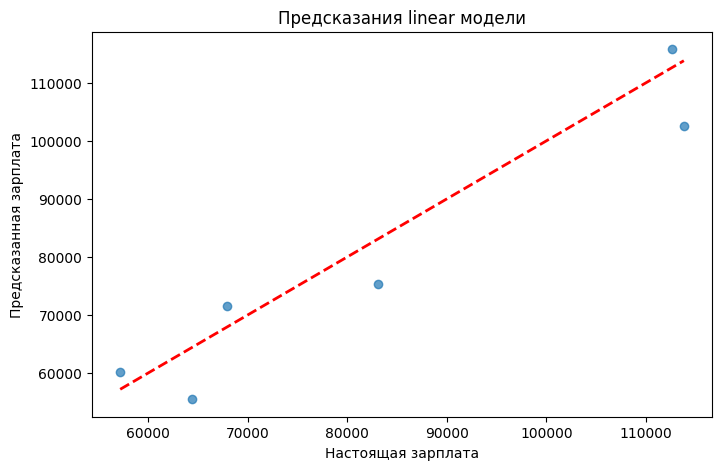


TREE модель:
Ошибка (MSE): 101047709.83
Точность (R²): 0.80


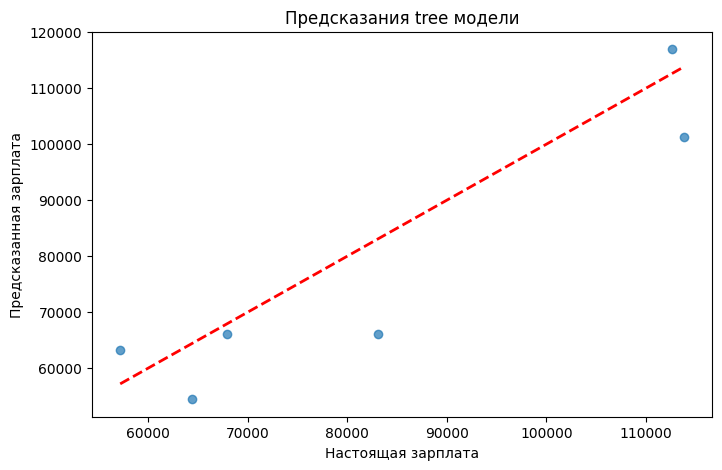


FOREST модель:
Ошибка (MSE): 63721129.71
Точность (R²): 0.88


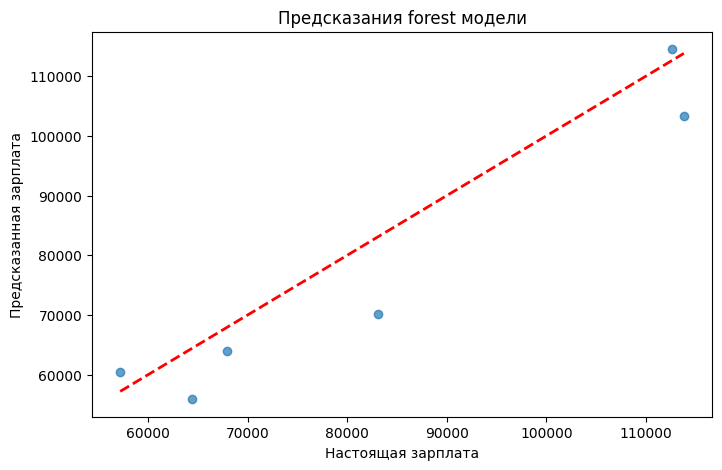

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path):

    try:
        df = pd.read_csv(file_path)
        print(f"Данные загружены: {df.shape[0]} строк, {df.shape[1]} колонок")
        return df
    except Exception as e:
        print(f"Ошибка загрузки: {e}")
        return None

def train_and_plot(df, model_type="linear"):

    #Обучение модели для предсказания зарплаты по опыту работы

    X = df[['YearsExperience']]
    y = df['Salary']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == "linear":
        model = LinearRegression()
    elif model_type == "tree":
        model = DecisionTreeRegressor(random_state=42)
    elif model_type == "forest":
        model = RandomForestRegressor(random_state=42, n_estimators=100)
    else:
        return None

    model.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = model.predict(X_test)

    # Оцениваем качество
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_type.upper()} модель:")
    print(f"Ошибка (MSE): {mse:.2f}")
    print(f"Точность (R²): {r2:.2f}")

    # Простая визуализация
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Настоящая зарплата")
    plt.ylabel("Предсказанная зарплата")
    plt.title(f"Предсказания {model_type} модели")
    plt.show()

    return model

def predict_salary(model, years_experience):
    """Предсказание зарплаты для заданного опыта работы"""
    prediction = model.predict([[years_experience]])[0]
    return prediction

if __name__ == "__main__":
    # Загружаем данные
    df = load_data("Salary_Data.csv")

    if df is not None:
        # Обучаем модели
        print("Обучаем модели машинного обучения...")

        linear_model = train_and_plot(df, "linear")
        tree_model = train_and_plot(df, "tree")
        forest_model = train_and_plot(df, "forest")

    else:
        print("Не удалось загрузить данные")